In [3]:
import pandas as pd
import numpy as np

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='target', data= train)
Labels= ('No Disaster', 'Real Disaster')
plt.xticks(range(2), Labels)

([<matplotlib.axis.XTick at 0x1215b2c88>,
 <a list of 2 Text xticklabel objects>)

In [10]:
#https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/analyze-tweet-sentiments-in-python/
from textblob import TextBlob
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tw) for tw in train['text']]
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity] for tweet in sentiment_objects]

#polarity values that range from 1 to -1.
#Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity"])
sentiment_df.head(10)

,polarity
0,0.00000
1,0.10000
2,-0.01875
3,0.00000
4,0.00000
5,-0.11250
6,-0.20000
7,0.50000
8,0.00000
9,-0.60000


In [11]:
def add_polarity(_df):
    _df = pd.concat([_df, sentiment_df], axis=1)
    return _df
train=add_polarity(train)

In [12]:
train.head(5)

,id,keyword,location,text,target,polarity
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.00000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.10000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,-0.01875
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.00000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.00000


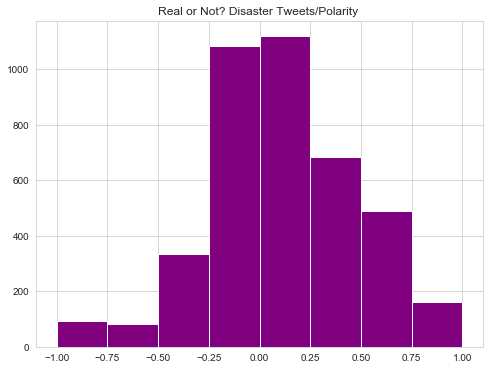

In [13]:
#del tweet_disaster['polarity']
#Analyze Sentiments Using Twitter Data
# Remove polarity values equal to zero
import matplotlib.pyplot as plt
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Real or Not? Disaster Tweets/Polarity ")
plt.show()

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/rand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rand/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from textblob import Word 

In [19]:
#NLP tweets: Cleaning & Preprocessing tweets Data
stop_words = set(stopwords.words('english'))
tweet_1=[]
for tw in train["text"]:
    word_tokens = word_tokenize(tw) 
    #Delete ponctuation
    word_tokens=[word.lower() for word in word_tokens if word.isalpha()]
    #Delete stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words : 
            if  w!='http':
                filtered_sentence.append(w) 
               
    #print(word_tokens) 
    #print(filtered_sentence) 
    
    Stem_words = []
    ps =PorterStemmer()
    for w in filtered_sentence:
        rootWord=ps.stem(w)
        Stem_words.append(rootWord)
    #print(filtered_sentence)
    #print(Stem_words)
    #https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
    lem=[]
    for w in filtered_sentence:
        word1 = Word(w).lemmatize("n")
        word2 = Word(word1).lemmatize("v")
        word3 = Word(word2).lemmatize("a")
        lem.append(Word(word3).lemmatize())
    tweet_1.append(lem)
     

In [20]:
sentiment_objects = [TextBlob(str(t)) for t in tweet_1]
sentiment_values = [[tweet_1.sentiment.polarity, str(tweet_1)] for tweet_1 in sentiment_objects]
sentiment_values[0]
sentiment_df1 = pd.DataFrame(sentiment_values, columns=["polarity_lem", "lems"])
sentiment_df1.head(10)


,polarity_lem,lems
0,0.000,"['deed', 'reason', 'earthquake', 'may', 'allah..."
1,0.100,"['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,0.000,"['resident', 'ask', 'place', 'notify', 'office..."
3,0.000,"['people', 'receive', 'wildfire', 'evacuation'..."
4,0.000,"['get', 'send', 'photo', 'ruby', 'alaska', 'sm..."
5,-0.125,"['rockyfire', 'update', 'california', 'hwy', '..."
6,-0.200,"['flood', 'disaster', 'heavy', 'rain', 'cause'..."
7,0.500,"['top', 'hill', 'see', 'fire', 'wood']"
8,0.000,"['emergency', 'evacuation', 'happen', 'build',..."
9,-0.600,"['afraid', 'tornado', 'come', 'area']"


In [21]:
def add_polarity1(_df):
    _df = pd.concat([_df, sentiment_df1["lems"]], axis=1)
    return _df

In [22]:
train=add_polarity1(train)

In [23]:
train.head()

,id,keyword,location,text,target,polarity,lems
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.00000,"['deed', 'reason', 'earthquake', 'may', 'allah..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.10000,"['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,-0.01875,"['resident', 'ask', 'place', 'notify', 'office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.00000,"['people', 'receive', 'wildfire', 'evacuation'..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.00000,"['get', 'send', 'photo', 'ruby', 'alaska', 'sm..."


In [24]:
train["lems"]= train["lems"].str.replace("[", "") 
train["lems"]= train["lems"].str.replace("]", "") 
train["lems"]= train["lems"].str.replace("\'", "") 
train["lems"]= train["lems"].str.replace(",", " ") 
train.head()

,id,keyword,location,text,target,polarity,lems
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.00000,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.10000,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,-0.01875,resident ask place notify officer evacuat...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.00000,people receive wildfire evacuation order ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.00000,get send photo ruby alaska smoke wildfir...


In [25]:
#NLP tweets: Cleaning & Preprocessing tweets Data
stop_words = set(stopwords.words('english'))
tweet_2=[]
for tw in test["text"]:
    word_tokens = word_tokenize(tw) 
    #Delete ponctuation
    word_tokens=[word.lower() for word in word_tokens if word.isalpha()]
    #Delete stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words : 
            if  w!='http':
                filtered_sentence.append(w) 
               
    #print(word_tokens) 
    #print(filtered_sentence) 
    
    Stem_words = []
    ps =PorterStemmer()
    for w in filtered_sentence:
        rootWord=ps.stem(w)
        Stem_words.append(rootWord)
    #print(filtered_sentence)
    #print(Stem_words)
    #https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
    lem=[]
    for w in filtered_sentence:
        word1 = Word(w).lemmatize("n")
        word2 = Word(word1).lemmatize("v")
        word3 = Word(word2).lemmatize("a")
        lem.append(Word(word3).lemmatize())
    tweet_2.append(lem)   

In [26]:
sentiment_objects = [TextBlob(str(t)) for t in tweet_2]
sentiment_values = [[tweet_2.sentiment.polarity, str(tweet_2)] for tweet_2 in sentiment_objects]
sentiment_values[0]
sentiment_df1 = pd.DataFrame(sentiment_values, columns=["polarity_lem", "lems"])
sentiment_df1.head(10)

,polarity_lem,lems
0,-1.00,"['happen', 'terrible', 'car', 'crash']"
1,0.25,"['hear', 'earthquake', 'different', 'city', 's..."
2,0.00,"['forest', 'fire', 'spot', 'pond', 'goose', 'f..."
3,0.40,"['apocalypse', 'light', 'spokane', 'wildfire']"
4,0.00,"['typhoon', 'soudelor', 'kill', 'china', 'taiw..."
5,0.00,"['shake', 'earthquake']"
6,0.00,"['probably', 'still', 'show', 'life', 'arsenal..."
7,0.00,['hey']
8,0.60,"['nice', 'hat']"
9,-0.40,['fuck']


In [27]:
def add_polarity2(_df):
    _df = pd.concat([_df, sentiment_df1], axis=1)
    return _df
test=add_polarity2(test)

In [28]:
test["lems"]= test["lems"].str.replace("[", "") 
test["lems"]= test["lems"].str.replace("]", "") 
test["lems"]= test["lems"].str.replace("\'", "") 
test["lems"]= test["lems"].str.replace(",", " ") 
test.head()

,id,keyword,location,text,polarity_lem,lems
0,0,NaN,NaN,Just happened a terrible car crash,-1.00,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0.25,hear earthquake different city stay safe ...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0.00,forest fire spot pond goose flee across ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0.40,apocalypse light spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0.00,typhoon soudelor kill china taiwan


In [29]:
#we use skcikit-learn's CountVectorizer to count the words in each tweet and turn them into data our
#machine learning model can process.
#CountVectorizer - Convert a collection of text documents to a matrix of token counts
#and an integer count for the number of times each word appeared in the document.
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
#count_vectorizer.fit(train["lems"])
# Call the transform() function on one or more documents as needed to encode each as a vector.
#X_train_count_vec = count_vectorizer.transform(train["lems"])
#X_test_count_vec = count_vectorizer.transform(test["lems"])
X_train = count_vectorizer.fit_transform(train["lems"])
X_test = count_vectorizer.transform(test["lems"])

In [30]:
print(X_test .shape)
print(type(X_test ))
print(X_test.toarray())
#essai----------------------------------------------------------------------------------------

(3263, 12393)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
#TfidfVectorizer - Convert text to word frequency vectors.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train["lems"])
X_test_tfidf = tfidf_vectorizer.transform(test["lems"])

In [32]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
clf = linear_model.RidgeClassifier()

In [33]:
scores = model_selection.cross_val_score(clf, X_train, train["target"], cv=3, scoring="f1")
scores

array([0.59885833, 0.55169082, 0.62944162])

In [34]:
clf.fit(X_train,train["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [35]:
# Fitting Logistic Regression on Count Vectors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_reg= LogisticRegression()
scores = model_selection.cross_val_score(logistic_reg, X_train, train["target"], cv=3, scoring="f1")
scores

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.61447721, 0.58485898, 0.63438735])

In [36]:
logistic_reg.fit(X_train,train["target"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
# Fitting Logistic Regression on tfidf
logistic_reg_tfidf = LogisticRegression()
scores = model_selection.cross_val_score(logistic_reg_tfidf, X_train_tfidf, train["target"], cv=3, scoring="f1")
scores
logistic_reg_tfidf.fit(X_train_tfidf,train["target"])
y_predicted_logistic_reg_tfidf = logistic_reg_tfidf.predict(X_test_tfidf)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.naive_bayes import MultinomialNB
multinomial_naive_bayes = MultinomialNB()
scores = model_selection.cross_val_score(multinomial_naive_bayes, X_train, train["target"], cv=3, scoring="f1")
scores


array([0.68124709, 0.63862661, 0.71506504])

In [39]:
multinomial_naive_bayes.fit( X_train, train["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
# Fitting Naive Bayes on tfidf
multinomial_naive_bayes_tfidf = MultinomialNB()
scores = model_selection.cross_val_score(multinomial_naive_bayes_tfidf, X_train_tfidf, train["target"], cv=3, scoring="f1")
scores
multinomial_naive_bayes_tfidf.fit(X_train_tfidf, train["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
# Fitting SVM on Count Vector
# Since SVM takes a lot of time, we will reduce the number of features using SVD and standardize the data before applying SVM.
# Apply SVD, 120-200 components are good enough for SVM model.

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svd = TruncatedSVD(n_components=120)
xtrain_svd = svd.fit_transform(X_train)
xtest_svd= svd.transform(X_test)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = StandardScaler()
xtrain_svd_scl = scl.fit_transform(xtrain_svd)
xtest_svd_scl = scl.transform(xtest_svd)
# Fitting a simple SVM
svm = SVC()
scores = model_selection.cross_val_score(svm , xtrain_svd_scl, train["target"], cv=3, scoring="f1")
scores
svm.fit(xtrain_svd_scl,  train["target"])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
# Fitting SVM on tfidf
svd_tfidf = TruncatedSVD(n_components=120)
xtrain_svd_tfidf = svd_tfidf.fit_transform(X_train_tfidf)
xtest_svd_tfidf = svd_tfidf.transform(X_test_tfidf)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl_tfidf = StandardScaler()
xtrain_svd_scl_tfidf = scl_tfidf.fit_transform(xtrain_svd_tfidf)
xtest_svd_scl_tfidf = scl_tfidf.transform(xtest_svd_tfidf)

# Fitting a simple SVM
svm_tfidf = SVC()
scores = model_selection.cross_val_score(svm_tfidf , xtrain_svd_scl_tfidf, train["target"], cv=3, scoring="f1")
scores
svm_tfidf.fit(xtrain_svd_scl_tfidf,  train["target"])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
# Fitting xgboost on Count Vector
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(xgb_classifier, X_train, train["target"], cv=3, scoring="f1")
scores
xgb_classifier.fit(X_train,  train["target"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=10, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [48]:
# Fitting xgboost on tfidf
xgb_classifier_tfidf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(xgb_classifier_tfidf , X_train_tfidf, train["target"], cv=3, scoring="f1")
scores
xgb_classifier_tfidf.fit(X_train_tfidf,train["target"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=10, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [49]:
# Fitting xgboost on Count Vector svd feature
xgb_classifier_svd= xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(xgb_classifier_svd, xtrain_svd, train["target"], cv=3, scoring="f1")
scores
xgb_classifier_svd.fit(xtrain_svd, train["target"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=10, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [50]:
# Fitting a simple xgboost on tfidf svd features
xgb_classifier_svd_tfidf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(xgb_classifier_svd_tfidf, xtrain_svd_scl_tfidf, train["target"], cv=3, scoring="f1")
scores
xgb_classifier_svd_tfidf.fit(xtrain_svd_scl_tfidf, train["target"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=10, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [51]:
sample_submission = pd.read_csv("sample_submission.csv")

In [52]:
sample_submission["target"]= multinomial_naive_bayes.predict(X_test)
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [53]:
sample_submission.to_csv("submission.csv", index=False)

In [54]:
sample_submission_test = pd.read_csv("test.csv")

In [55]:
sample_submission_test["target"]= multinomial_naive_bayes.predict(X_test)

In [56]:
sample_submission_test.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [57]:
sample_submission_test.to_csv("submission_test.csv", index=False)